In [1]:
%load_ext autoreload
%autoreload 2

from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/o48uhuwah8n2xww/basic_material.py?dl=0
%run basic_material

from scipy.integrate import solve_bvp

Running Python: 3.9.9


$$ \ddot y = f(t,y(t)) $$
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html

In [2]:
N = 500
t = np.linspace(0, 1, N)

data0 = [0, 0, 1, 1, 100/180*np.pi, 3*np.pi/4, 4, 0.00025]
data1 = [0, 0, 1, 1, 100/180*np.pi, 3*np.pi/4, 4, 0.25]
data2 = [0, 0, 1, 1, 1/6*np.pi, 5*np.pi/4, 4, 0.25]

In [3]:
def bc(ya, yb):
    xt0 = ya[0]
    xtf = yb[0]
    yt0 = ya[1]
    ytf = yb[1]
    tht0 = ya[2]
    thtf = yb[2]
    p1tf = yb[3]
    p2tf = yb[4]
    p3tf = yb[5]
    utf = -p3tf/(2*alpha)
    H = 1+alpha*utf**2+V*np.cos(thtf)*p1tf+V*np.sin(thtf)*p2tf+p3tf*utf
    return np.array([xt0-x0,yt0-y0,tht0-theta0,xtf-xf,ytf-yf,thtf-thetaf,H])

def fun(t,xv):
    x = xv[0]
    y = xv[1]
    theta = xv[2]
    p1 = xv[3]
    p2 = xv[4]
    p3 = xv[5]
    u = -p3/(2*alpha)
    ff = np.array(xv[6]*[V*np.cos(theta),V*np.sin(theta),u,0*u,0*u,
                         (V*np.sin(theta)*p1-V*np.cos(theta)*p2),0*u])    
    return ff

In [4]:
y_init = np.zeros((6+1,N))

x0,y0,xf,yf,theta0,thetaf,V,alpha = data0
y_init[0,:] = [x0 for i in range(N)] 
y_init[1,:] = [y0 for i in range(N)] 
y_init[2,:] = [theta0 for i in range(N)] 
y_init[6,:] = [1 for i in range(N)] 
res0 = solve_bvp(fun, bc, t, y_init, max_nodes=10000, tol=1e-8)
print(res0.success)

x0,y0,xf,yf,theta0,thetaf,V,alpha = data1
y_init[2,:] = [theta0 for i in range(N)] 
y_init[6,:] = [1 for i in range(N)] 
res1 = solve_bvp(fun, bc, t, y_init, max_nodes=10000, tol=1e-8)
print(res1.success)

x0,y0,xf,yf,theta0,thetaf,V,alpha = data2
y_init[2,:] = [theta0 for i in range(N)] 
y_init[6,:] = [5 for i in range(N)] 
res2 = solve_bvp(fun, bc, t, y_init, max_nodes=10000, tol=1e-8)
print(res2.success)

True
True
True


In [5]:
def res_plot(res,name='figs/bvp_dubins',num=11,alp=0):
    plt.figure(figsize = (6,6))
    plt.plot(res.y[0,:], res.y[1,:],label='Path')
    plt.plot(res.y[0,0], res.y[1,0],'gs')
    plt.plot(res.y[0,-1], res.y[1,-1],'rs')
    plt.xlabel('x(t)')
    plt.ylabel('y(t)')
    plt.text((res.y[0,0]+res.y[0,-1])/2,(res.y[1,0]+res.y[1,-1])/2,'alpha = '+str(alp))
    plt.legend()
    plt.legend(fontsize=14)

    plt.title('BVP Dubins Solution - Free Final Time = '+str(round(res.y[6,0],2)))
    nicegrid()
    plt.savefig(name+str(num)+'.png')
    plt.show()
    
    tt = res.x*res.y[6,0]
    plt.figure(figsize = (6,6))
    plt.plot(tt, res.y[0,:],label='x')
    plt.plot(tt, res.y[1,:],label='y')
    plt.plot(tt, res.y[2,:],label='theta')
    plt.xlabel('t')
    plt.ylabel('response')
    plt.legend()
    plt.legend(fontsize=14)

    plt.title('BVP Solution - Free Final Time = '+str(round(res.y[6,0],2)))
    plt.xlim([min(tt),max(tt)])
    #plt.ylim([-2,2])
    nicegrid()
    plt.savefig(name+str(num+1)+'.png')
    plt.show()

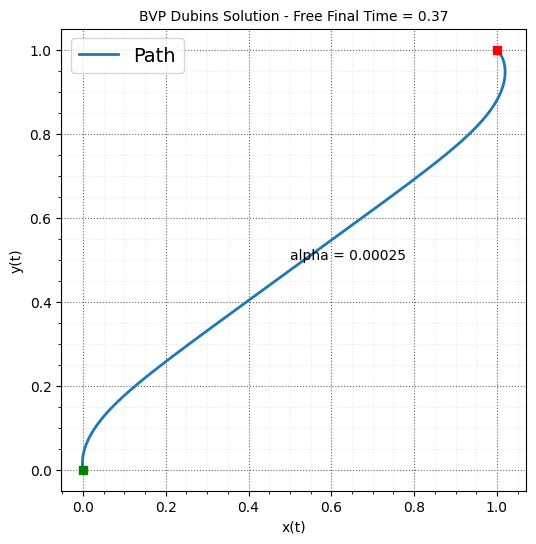

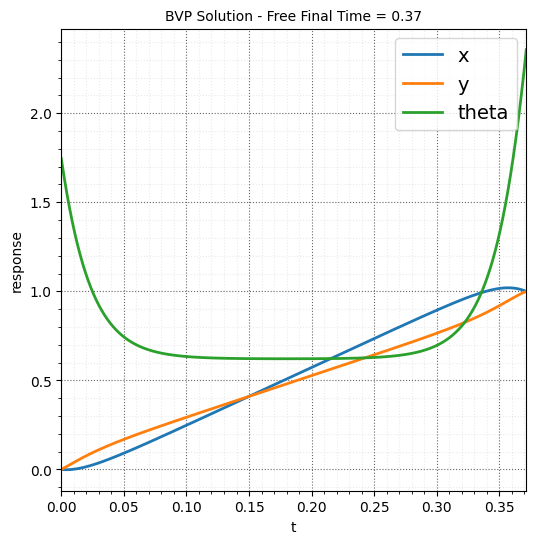

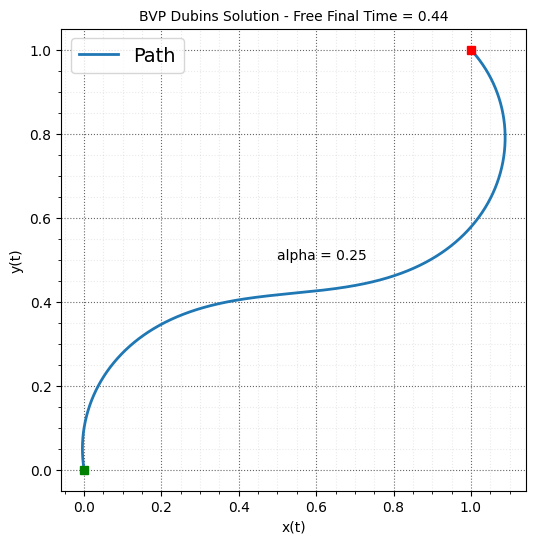

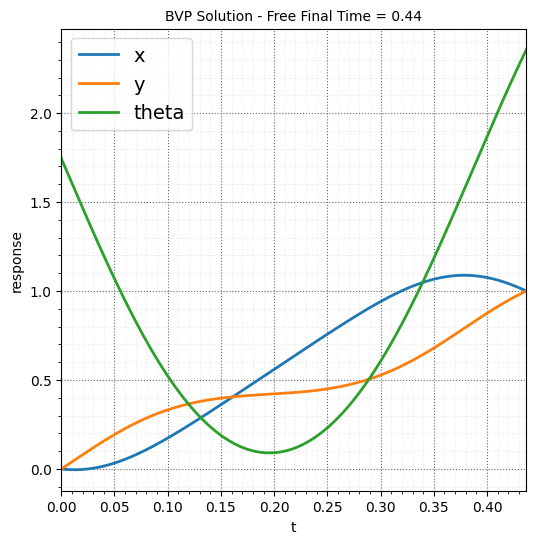

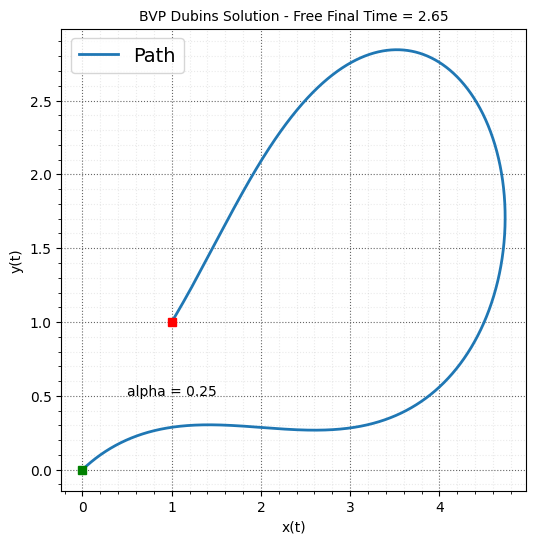

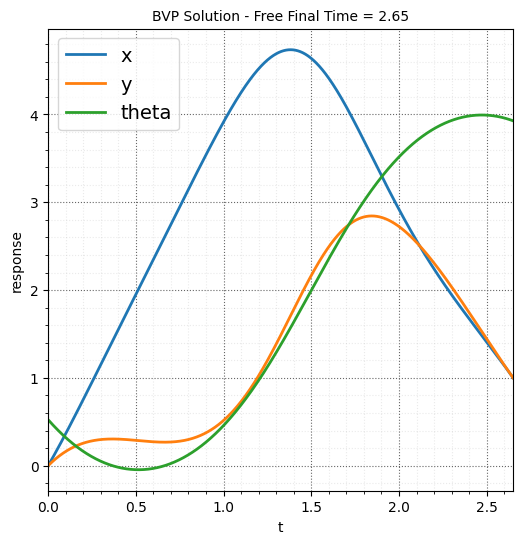

In [6]:
if res0.success:
    res_plot(res0,num=11,alp=data0[7])
if res1.success:
    res_plot(res1,num=21,alp=data1[7])
if res2.success:
    res_plot(res2,num=31,alp=data2[7])